https://odsc.medium.com/implementing-a-kernel-principal-component-analysis-in-python-495f04a7f85f

In [33]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np 
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]  
    gamma: float
            Tuning parameter of the RBF kernel    
    n_components: int
        Number of principal components to return    
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
        Projected dataset   
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean') # C(100,2)=100x99/2!=50x99=4950
    print(sq_dists)
    print(sq_dists.shape)
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)  
    print(mat_sq_dists)
    print(mat_sq_dists.shape)
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)    # K(xm,xn)=exp(-r*(xn-xm)^2)
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])    
    return X_pc


[[ 8.71318704e-01  4.90717552e-01]
 [ 7.15472413e-01 -4.58667853e-01]
 [ 1.46253829e+00 -3.86599306e-01]
 [-2.22520934e-01  9.74927912e-01]
 [ 3.27699110e-01 -2.40277997e-01]
 [ 1.00000000e+00  0.00000000e+00]
 [ 9.49055747e-01  3.15108218e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.40478334e+00 -4.14412623e-01]
 [ 9.67294863e-01  2.53654584e-01]
 [ 9.60230259e-02  9.95379113e-01]
 [ 4.27883340e-01 -3.20172255e-01]
 [ 1.09602303e+00 -4.95379113e-01]
 [ 1.98586378e-01 -9.81105305e-02]
 [ 3.20515776e-02  9.99486216e-01]
 [-9.00968868e-01  4.33883739e-01]
 [ 1.15959990e+00 -4.87181783e-01]
 [-7.61445958e-01  6.48228395e-01]
 [ 7.30832427e-02  1.24732995e-01]
 [ 1.03205158e+00 -4.99486216e-01]
 [-6.23489802e-01  7.81831482e-01]
 [ 1.76144596e+00 -1.48228395e-01]
 [ 3.45365054e-01  9.38468422e-01]
 [-2.84527587e-01  9.58667853e-01]
 [-4.04783343e-01  9.14412623e-01]
 [ 1.87131870e+00  9.28244800e-03]
 [ 1.62348980e+00 -2.81831482e-01]
 [ 8.38088105e-01  5.45534901e-01]
 [ 1.84408430e-02  3

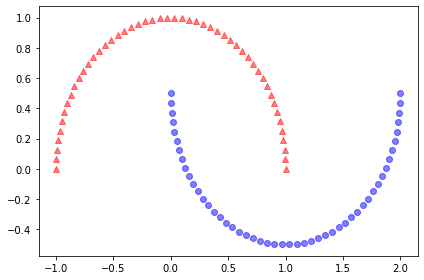

In [37]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(100, random_state=123)
print(X)
print(X.shape)
print(y)
print(y.shape)
print(X[y==0, 0])

# Thus X[y==0,0] finds all the rows of X that have a y value of 0 (y == 0), 
# and are in the first column of X

plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

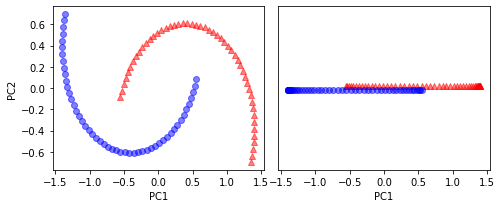

In [38]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

[0.92562071 1.11922547 1.43094483 ... 2.74227495 1.542287   2.19204605]
(4950,)
[[0.         0.92562071 1.11922547 ... 0.32382379 1.24046572 0.86735455]
 [0.92562071 0.         0.5633013  ... 1.8737194  1.68080021 0.06541027]
 [1.11922547 0.5633013  0.         ... 2.62103471 0.39717276 0.96321486]
 ...
 [0.32382379 1.8737194  2.62103471 ... 0.         2.74227495 1.542287  ]
 [1.24046572 1.68080021 0.39717276 ... 2.74227495 0.         2.19204605]
 [0.86735455 0.06541027 0.96321486 ... 1.542287   2.19204605 0.        ]]
(100, 100)


<ipython-input-33-40d25d04a651>:30: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


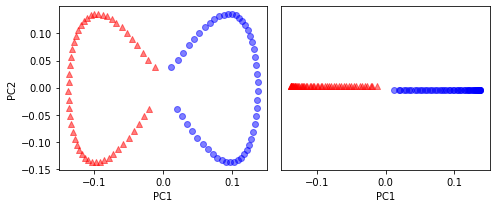

In [39]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

In [40]:
# The followings are tests

In [4]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
from scipy import exp
X=np.array([[1, 2], [3, 4], [5, 6]])
sq_dists = pdist(X, 'sqeuclidean') # the squared Euclidean distance between paired vectors.
print(X)
print(X.shape)
print(sq_dists)
mat_sq_dists = squareform(sq_dists)  
print(mat_sq_dists)
print(exp(-1 * mat_sq_dists))
print(np.sum(exp(-1 * mat_sq_dists)))

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
[ 8. 32.  8.]
[[ 0.  8. 32.]
 [ 8.  0.  8.]
 [32.  8.  0.]]
[[1.00000000e+00 3.35462628e-04 1.26641655e-14]
 [3.35462628e-04 1.00000000e+00 3.35462628e-04]
 [1.26641655e-14 3.35462628e-04 1.00000000e+00]]
3.0013418505116354


<ipython-input-4-4d3d730d42f9>:11: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  print(exp(-1 * mat_sq_dists))
<ipython-input-4-4d3d730d42f9>:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  print(np.sum(exp(-1 * mat_sq_dists)))


In [46]:
N=3
one_n = np.ones((N,N)) / N
print(one_n)

[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [49]:
K=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(K)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [48]:
print(one_n.dot(K)) # one_n x K 兩矩陣相乘

[[4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]]


In [50]:
print(K.dot(one_n)) # K x one_n  兩矩陣相乘

[[2. 2. 2.]
 [5. 5. 5.]
 [8. 8. 8.]]


In [52]:
print(one_n.dot(K).dot(one_n)) # one_n x K x one_n

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
